# Métodos iterativos aplicados a un problema inverso discreto

## Autores
* Klarreich, Aaron
* Luna, Kevin
* Martínez, Fausto
* Rivas, Jazmín

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import warnings

## Método de Jacobi

En el método de Jacobi, escribimos a la matriz $A$ como

$$A=D+R$$

donde $D$ es diagonal y $R$ es la suma de una matriz triangular inferior $L$ y una matriz triangular superior $U$, es decir $R=L+U$. Para resolver $Ax=b$, tenemos:

$$(D+R)x=b$$
$$Dx + Rx = b$$

y por lo tanto,

$$x = D^{-1} (b-Rx)$$

Si fuera que $a_{ii}=0$ para todo $i$, entonces la regla iterativa del método de Jacobi puede ser definida como:

$$x^{(k+1)} = D^{-1} \left(b-Rx^{(k)}\right)$$

o de otra manera:

$$x_i^{(k+1)} = \frac{1}{a_{ii}} \left(b_i - \sum_{j\neq i} a_{ij}x_j^{(k)} \right) \, \text{, para todo } i$$

In [2]:
def Jacobi(A, b, tol = 1e-10, tope_iteraciones = 1000):
    # Chequeamos que las dimensiones sean apropiadas
    if A.shape[0] != A.shape[1]:
        raise ValueError("La matriz A no es cuadrada")
    if A.shape[1] != b.shape[0]:
        raise ValueError("Las dimensiones del sistema no cuadran")

    # Definimos a n como la dimensión de la matriz
    n = A.shape[0]

    # Inicializamos el vector respuesta
    x = np.zeros(n)
    
    k = 0
    # Iteramos mientras no superemos el límite de iteraciones
    while k < tope_iteraciones:
        # Creamos una copia del vector x
        x_nuevo = np.copy(x)

        # Actualizamos a x_nuevo, que es x_i ^(k+1) en nuestra notación de arriba, siguiendo al método de Jacobi
        for i in range(n):
            suma = sum(A[i][j] * x[j] for j in range(n) if j != i)  
            x_nuevo[i] = (b[i] - suma) / A[i][i]
        
        # Si el método se estacionó, es decir, la diferencia entre el x_nuevo y el antiguo es menor que cierta tolerancia,
        # directamente devolvemos el x_nuevo
        if np.linalg.norm(x_nuevo - x, ord = np.inf) < tol:
            return x_nuevo

        # Actualizamos el valor de x para la siguiente iteración, y aumentamos en 1 el número de iteraciones
        x = x_nuevo
        k += 1
        
    # Si terminamos el while sin que el método se estacione, hacemos que la función devuelva un mensaje de advertencia.
    warnings.warn(f"Advertencia: se alcanzó el tope de {tope_iteraciones} iteraciones sin converger.")
    return x_nuevo

#### Ejemplo 1 - Criterio EDD

Tomemos la matriz estrictamente diagonal dominante:

$$
A
=
\begin{pmatrix}
10 & 2 & 1\\
1 & 10 & 2\\
2 & 3 & 10\\
\end{pmatrix}
$$

que por lo probado teóricamente debería converger.

In [3]:
# Definimos una matriz y un vector para probar la función

A = np.asarray([[10,2,1],[1,10,2],[2,3,10]])
b = np.array([7,8,9])

In [4]:
# Vemos la solución que nos da Python con numpy
np.linalg.solve(A,b)

array([0.51372119, 0.62678375, 0.60922064])

In [5]:
# Vemos la solución que nos da nuestro método de Jacobi
Jacobi(A,b)

array([0.51372119, 0.62678375, 0.60922064])

Vemos, que como teníamos probado teóricamente, el método parece converger a una buena solución

#### Ejemplo 2 - Método no convergiendo

Si tomamos la matriz
$$
A
=
\begin{pmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 10 \\
\end{pmatrix}
$$

observaremos que al no cumplir ninguna de las condiciones de Jacobi, podría no converger a una buena solución.

In [6]:
# Definimos otra matriz para probar cuando Jacobi no converge

A = np.asarray([[1,2,3],[4,5,6],[7,8,10]])
b = np.array([7,8,9])

In [7]:
# Vemos la solución que nos da nuestro método de Jacobi
Jacobi(A,b)

C:\Users\Fausto\AppData\Local\Temp\ipykernel_17736\1096253739.py:22: RuntimeWarning: overflow encountered in scalar add
  suma = sum(A[i][j] * x[j] for j in range(n) if j != i)
C:\Users\Fausto\AppData\Local\Temp\ipykernel_17736\1096253739.py:22: RuntimeWarning: overflow encountered in scalar multiply
  suma = sum(A[i][j] * x[j] for j in range(n) if j != i)
C:\Users\Fausto\AppData\Local\Temp\ipykernel_17736\1096253739.py:35: UserWarning: Advertencia: se alcanzó el tope de 1000 iteraciones sin converger.
  warnings.warn(f"Advertencia: se alcanzó el tope de {tope_iteraciones} iteraciones sin converger.")


array([-inf, -inf, -inf])

Obtenemos la advertencia de que llegamos al tope de iteraciones que habíamos planteado para la función, pero, ¿y si forzamos más iteraciones?

In [8]:
# Vemos la solución que nos da nuestro método de Jacobi forzando más iteraciones
Jacobi(A,b,tope_iteraciones = 10000)

C:\Users\Fausto\AppData\Local\Temp\ipykernel_17736\1096253739.py:22: RuntimeWarning: overflow encountered in scalar add
  suma = sum(A[i][j] * x[j] for j in range(n) if j != i)
C:\Users\Fausto\AppData\Local\Temp\ipykernel_17736\1096253739.py:22: RuntimeWarning: overflow encountered in scalar multiply
  suma = sum(A[i][j] * x[j] for j in range(n) if j != i)
C:\Users\Fausto\AppData\Local\Temp\ipykernel_17736\1096253739.py:35: UserWarning: Advertencia: se alcanzó el tope de 10000 iteraciones sin converger.
  warnings.warn(f"Advertencia: se alcanzó el tope de {tope_iteraciones} iteraciones sin converger.")


array([-inf, -inf, -inf])

In [9]:
np.linalg.solve(A,b)

array([-6.33333333e+00,  6.66666667e+00,  1.77635684e-15])

Vemos que las soluciones en este caso son significativamente distintas. Esto nos confirma que para la utilización de métodos iterativos deberemos ser cautelosos sobre las condiciones que hay que imponerle a la matriz para que converjan, y que el estudio de la convergencia de los métodos es muy importante.

## Método de Gauss-Seidel

En el método de Gauss-Seidel, escribimos a la matriz $A$ como

$$A= R + U$$

donde $U$ es triangular superior con ceros en la diagonal y $R$ es la suma de una matriz triangular inferior $L$ y la matrix diagonal $D$, es decir $R=L+D$. Para resolver $Ax=b$, tenemos:

$$(R+U)x=b$$
$$Rx + Ux = b$$

y por lo tanto,

$$x = R^{-1} (b-Ux)$$

Si fuera que $a_{ii}=0$ para todo $i$, entonces la regla iterativa del método de Gauss-Seidel puede ser definida como:

$$x^{(k+1)} = (L+D)^{-1} \left(b-Ux^{(k)}\right)$$

o de otra manera:

$$x_i^{(k+1)} = \frac{1}{a_{ii}} \left(b_i - \sum_{j = i+1}^{n} a_{ij}x_j^{(k)} - \sum_{j=1}^{i-1}a_{ij}x_{j}^{(k+1)} \right) \, \text{, para todo } i$$

In [10]:
def Gauss_Seidel(A, b, tol = 1e-10, tope_iteraciones = 1000):
    # Chequeamos que las dimensiones sean apropiadas
    if A.shape[0] != A.shape[1]:
        raise ValueError("La matriz A no es cuadrada")
    if A.shape[1] != b.shape[0]:
        raise ValueError("Las dimensiones del sistema no cuadran")

    # Definimos a n como la dimensión de la matriz
    n = A.shape[0]

    # Inicializamos el vector respuesta
    x = np.zeros(n)

    k = 0
    # Iteramos mientras no superemos el límite de iteraciones
    while k < tope_iteraciones:
        # Creamos una copia del vector x
        x_nuevo = np.copy(x)

        # Actualizamos a x_nuevo, que es x_i ^(k+1) en nuestra notación de arriba, siguiendo al método de Gauss-Seidel
        for i in range(n):
            suma = sum(A[i][j] * x_nuevo[j] for j in range(i)) + sum(A[i][j] * x[j] for j in range(i + 1, n))
            x_nuevo[i] = (b[i] - suma) / A[i][i]
            
        # Si el método se estacionó, es decir, la diferencia entre el x_nuevo y el antiguo es menor que cierta tolerancia,
        # directamente devolvemos el x_nuevo
        if np.linalg.norm(x_nuevo - x, ord = np.inf) < tol:
            return x_nuevo

        # Actualizamos el valor de x para la siguiente iteración, y aumentamos en 1 el número de iteraciones
        x = x_nuevo
        k += 1
        
    # Si terminamos el while sin que el método se estacione, hacemos que la función devuelva un mensaje de advertencia.    
    warnings.warn(f"Advertencia: se alcanzó el tope de {tope_iteraciones} iteraciones sin converger.")
    return x_nuevo

#### Ejemplo 1 - Criterio Hermitiana y Definida Positiva

Tomemos la matriz
$$
A
=
\begin{pmatrix}
0.3 & 0.1 & 0.2 \\
0.1 & 0.4 & 0.1 \\
0.2 & 0.1 & 0.3
\end{pmatrix}
$$
que, como veremos, es hermitiana y definida positiva, por lo que debería converger el método de Gauss-Seidel.

In [11]:
# Definimos otra matriz y otro vector para probar la función

A = np.asarray([[0.3,0.1,0.2],[0.1,0.4,0.1],[0.2,0.1,0.3]])
b = np.array([7,8,9])

In [12]:
# Aseveramos que la matriz es hermitiana
assert np.allclose(A.conj().T, A)
# Aseveramos que la matriz es definida positiva
assert np.all(np.linalg.eigvals(A)>0)

In [13]:
# Vemos la solución que nos da Python con numpy
np.linalg.solve(A,b)

array([ 3.33333333, 13.33333333, 23.33333333])

In [14]:
# Vemos la solución que nos da nuestro método de Jacobi
Gauss_Seidel(A,b)

array([ 3.33333333, 13.33333333, 23.33333333])

Observamos, entonces, el comportamiento esperado.

## Método de Residuo Generalizado Mínimo (GMRES)

Para resolver el problema $$\mathbf{Ax=b}\,,$$ definimos como $$\mathcal{K}_m = \mathcal{K}_m(\mathbf{A,b}) = \langle \mathbf{b, Ab, A^2 b, \dots, A^{m-1}b} \rangle$$ al subespacio de Krylov de $\mathbf A$ y $\mathbf b$ de dimensión $m$,

La idea del método GMRES nos dice que, dados $\mathbf{x_n} \in \mathcal{K}_n$ calculemos los residuos $\mathbf{r_n = b - Ax_n}$ e intentemos minimizarlos. Dado que $\mathbf{x_n} \in \mathcal{K}_n$, podemos definir la "matriz de Krylov"

$$\mathbf{K_n = \begin{pmatrix}|& |& | & | \\b & A^2 b & \dots & A^{n-1} b \\ |&|&|&|\end{pmatrix}}$$

y notar que entonces $\mathbf{x_n = K_n c}$ para algunos coeficientes $\mathbf{c}$ adecuados, y lo que queremos es escoger un $\mathbf c$ que minimice los residuos. Dicho de otra manera, queremos en cada paso

$$\mathbf{\min_{c} \|Ax_n - b\|}=\mathbf{\min_{c} \|AK_n c - b\|}\,.$$

El problema, lógicamente, viene en que las columnas de $\mathbf{K_n}$ no son ortonormales, por lo que trabajar con ellas puede ser un problema. En lugar de eso, buscamos $$\mathbf{K_n = Q_n R_n}\,,$$ una descomposición QR, donde $\mathbf{Q_n}$ sea ortogonal, de modo de usar esos vectores que si son ortonormales para nuestra conveniencia. Esto es porque podemos decir $$\mathbf{x_n = K_n c = Q_n H_n c = Q_n y}\,,$$ y trabajar con los coeficientes $\mathbf y$ en lugar de los $\mathbf c$, aprovechando la ortonormalidad.

Resulta entonces que el problema ahora es

$$\mathbf{\min_{y} \|AQ_n y - b\|}$$

También sabemos que, gracias al método de Arnoldi, podemos expresar a $\mathbf{AQ_n}$ como $\mathbf{Q_{n+1} \tilde{H}_n}$, donde $\mathbf{\tilde{H}_n}$ es una matriz de Hessenberg, resultando entonces el problema en

$$\mathbf{\min_{y} \|Q_{n+1} \tilde{H}_n y - b\|} = \mathbf{\min_{y} \|\tilde{H}_n y - Q_{n+1}^{T}b\|}$$

Y la observación final es que como se puede computar que $\mathbf{Q_{n+1}^{T}b = \|b\|e_1}$, resulta:

$$ \mathbf{\min_{y} \|\tilde{H}_n y - \|b\|e_1\|}$$

Lo cual podemos resolver con cualquier técnica de mínimos cuadrados. Para terminar la idea del algoritmo, cuando $\mathbf{\|r_n\|}$, sea menor a una tolerancia que impongamos, podemos terminar las iteraciones. 

# Ejemplo práctico

Vamos a aplicar estos métodos al problema de una imagen desenfocada

In [15]:
import funciones
import ejemplos

In [16]:
# Elegimos parámetros para los ejemplos
propagacion = [10, 10]
tamaño = 64
dimensiones = (tamaño, tamaño)
pixeles = dimensiones[0] * dimensiones[1]

Mostramos ahora el vector $\mathbf x_{\rm true}$

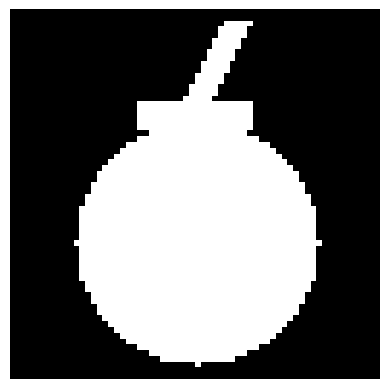

In [17]:
# Mostramos nuestro vector x_true con forma de H
x_true = ejemplos.construir_mate()
funciones.mostrar_vector(x_true, dimensiones)

Mostramos también el operador de difuminación, dado por la matriz $\mathbf A$, de la cual mostramos una de sus columnas

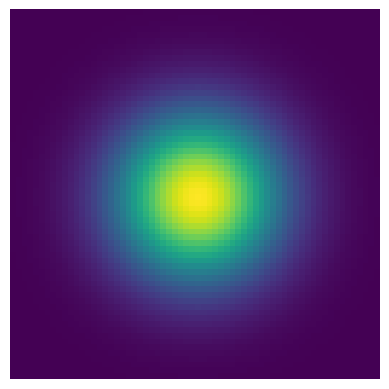

In [18]:
A = ejemplos.construir_A(propagacion, dimensiones)
plt.imshow(funciones.im(A[:, int(dimensiones[0]**2/2 + dimensiones[1]/2)], dimensiones))
plt.axis('off')
plt.show()

## Ejemplo del funcionamiento de la matriz de desenfoque $\mathbf A$ 

Para mostrar cómo funciona el operador de desenfoque, se lo aplicamos a una imagen con un solo pixel iluminado en el centro, llamemosla $\mathbf y_{\rm pixel}$.

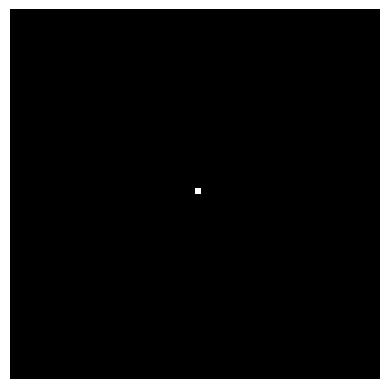

In [19]:
# Creamos un vector lleno de ceros y con uno representando el pixel del medio
y_pixel = np.zeros(pixeles)
y_pixel[2016] = 1
funciones.mostrar_vector(y_pixel, dimensiones)

Veamos entonces, como queda el pixel desenfocado (i.e. $\mathbf {A y_{\rm pixel}}$)

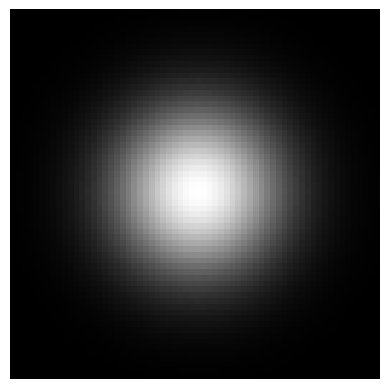

In [20]:
funciones.mostrar_vector(A.dot(y_pixel), dimensiones)

## Construcción del problema

Volviendo a nuestro problema, en la vida real, lo que vamos a tener como dato será un $\mathbf b$ ya desenfocado, y querremos tener la capacidad de reconstruir nuestra imagen original $\mathbf x_{\rm true}$. Pongámosnos entonces en ese caso hipótetico, obteniendo el $\mathbf b_{\rm true}$ de nuestra H que usamos como imagen, la $\mathbf x_{\rm true}$ de nuestro ejemplo. 

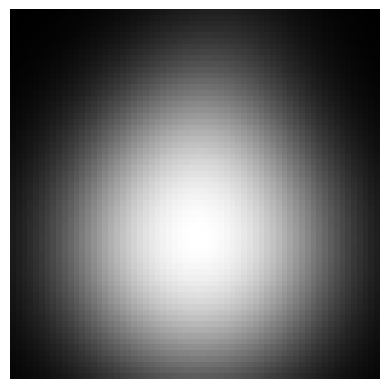

In [21]:
b_true = A @ x_true
funciones.mostrar_vector(b_true, dimensiones)

### Ruido

En la vida real, también se agregan aún más complicaciones: no conocemos una versión fidedigna de $\mathbf b_{\rm true}$, si no que por lo general esta viene trastocada por un ruido, el cual nosotros vamos a agregar a nuestro ejemplo artificial usando la función auxiliar $\texttt{agregar\_ruido}$ de el archivo de funciones auxiliares $\texttt{funciones.py}$

Para ello, tenemos varios ruidos distintos para agregar, que vamos a ir mostrando:

#### Ruido Gaussiano

Así quedaría la imagen luego de aplicarle un ruido gaussiano:

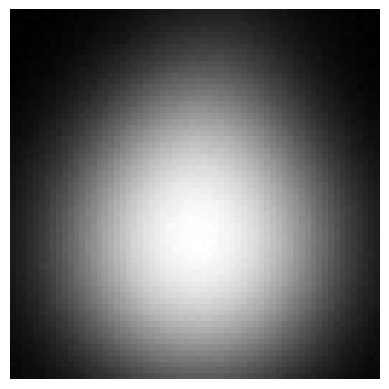

In [22]:
b_noise = funciones.agregar_ruido(b_true, opcion = "Gaussiano")
funciones.mostrar_vector(b_noise, dimensiones)

#### Ruido Poisson

Así quedaría la imagen con un ruido con una distribución de Poisson:

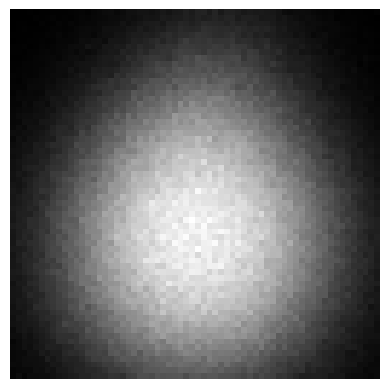

In [23]:
funciones.mostrar_vector(funciones.agregar_ruido(b_true, opcion = "Poisson"), dimensiones)

#### Ruido Laplace

Así quedaría la imagen al aplicarle un ruido dado por una distribución de Laplace:

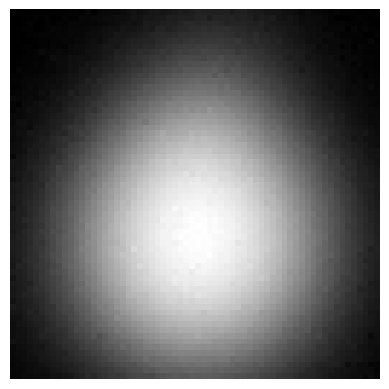

In [24]:
funciones.mostrar_vector(funciones.agregar_ruido(b_true, opcion = "Laplace"), dimensiones)

#### Ruido Salt & Pepper

Otro tipo de ruido: el Salt & Pepper, que ocurre en muchas imagenes, cubriendolas de manera dispersa con pixeles negros y blancos

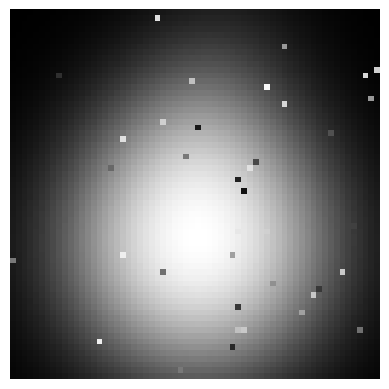

In [25]:
funciones.mostrar_vector(funciones.agregar_ruido(b_true, opcion = "saltpepper"), dimensiones)

## Resolución del problema

En lo que sigue, una vez ya charlado todo el tema de la difuminación y el inevitable ruido, vamos a trabajar con nuestro vector $\mathbf b_{\rm noise}$, generado con ruido Gaussiano, intentando reconstruir, a partir de él, una aproximación lo más buena que podamos de $\mathbf x_{\rm true}$. Por supuesto que, siempre debemos recordar que la gracia de esto es que en la vida real nunca vamos a conocer con precisión qué ruido sufrió la imagen, con lo cual el problema toma una dificultad distinta, y debemos recurrir a $\textit{métodos de regularización}$, que es el interés pricipal de este notebook

### ¿Por qué reconstruir sin regularizar es una mala idea?

La solución más ingenua a este problema sería simplemente resolver el sistema $\mathbf{Ax = \mathbf b}$ de una forma directa, probemos eso:

In [26]:
# Obtenemos la solución naive
x_naive = np.linalg.solve(A,b_noise)

Comparemos la imagen que obtuvimos con la original:

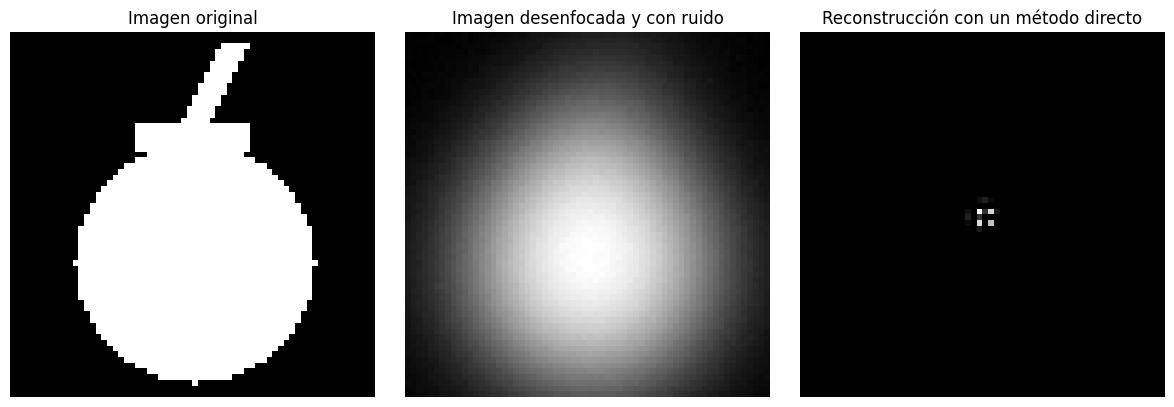

In [75]:
# Hacemos subplots para hacer 2 gráficos en uno
plt.figure(figsize=(12, 4))

# Graficamos la imagen original
plt.subplot(1, 3, 1)
imagen_true = funciones.im(x_true, dimensiones)
plt.imshow(imagen_true, vmin=0, vmax=np.max(imagen_true), cmap='gray')
plt.title("Imagen original")
plt.axis('off')

# Graficamos el dato recibido
plt.subplot(1, 3, 2)
imagen_b_noise = funciones.im(b_noise, dimensiones)
plt.imshow(imagen_b_noise, vmin=0, vmax=np.max(imagen_b_noise), cmap='gray')
plt.title("Imagen desenfocada y con ruido")
plt.axis('off')

# Graficamos la reconstrucción naive
plt.subplot(1, 3, 3)
imagen_naive = funciones.im(x_naive, dimensiones)
plt.imshow(imagen_naive, vmin=0, vmax=np.max(imagen_naive), cmap='gray')
plt.title("Reconstrucción con un método directo")
plt.axis('off')

# Mostramos
plt.savefig("Imagenes/mate_directo.png")
plt.tight_layout()
plt.show()

Podemos observar que la performance del método directo es, entonces, paupérrima, lo cual nos lleva a pensar maneras de solucionar este problema.

### Métodos de Jacobi y Gauss-Seidel

Podemos probar si con los métodos iterativos de Jacobi y Gauss-Seidel truncados obtenemos mejores soluciones

In [28]:
# Obtenemos las soluciones de Jacobi y de Gauss-Seidel
x_jacobi = Jacobi(A, b_noise, tope_iteraciones = 5)
x_gs = Gauss_Seidel(A, b_noise, tope_iteraciones = 5)

C:\Users\Fausto\AppData\Local\Temp\ipykernel_17736\1096253739.py:35: UserWarning: Advertencia: se alcanzó el tope de 5 iteraciones sin converger.
  warnings.warn(f"Advertencia: se alcanzó el tope de {tope_iteraciones} iteraciones sin converger.")


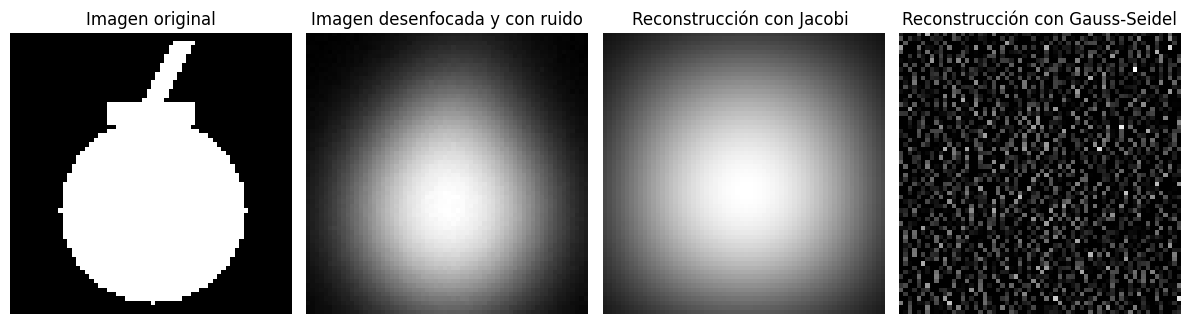

In [61]:
# Hacemos subplots para hacer 2 gráficos en uno
plt.figure(figsize=(12, 4))

# Graficamos la imagen original
plt.subplot(1, 4, 1)
plt.imshow(imagen_true, vmin=0, vmax=np.max(imagen_true), cmap='gray')
plt.title("Imagen original")
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(imagen_b_noise, vmin=0, vmax=np.max(imagen_b_noise), cmap='gray')
plt.title("Imagen desenfocada y con ruido")
plt.axis('off')

# Graficamos la reconstrucción naive
plt.subplot(1, 4, 3)
imagen_jacobi = funciones.im(x_jacobi, dimensiones)
plt.imshow(imagen_jacobi, vmin=0, vmax=np.max(imagen_jacobi), cmap='gray')
plt.title("Reconstrucción con Jacobi ")
plt.axis('off')

# Graficamos la reconstrucción naive
plt.subplot(1, 4, 4)
imagen_gs = funciones.im(x_gs, dimensiones)
plt.imshow(imagen_gs, vmin=0, vmax=np.max(imagen_gs), cmap='gray')
plt.title("Reconstrucción con Gauss-Seidel")
plt.axis('off')

# Mostramos
plt.tight_layout()
plt.show()

Vemos que la solución sigue siendo malísima.

### Controlar las iteraciones de GMRES

Un enfoque con el que se puede tratar el problema del mal condicionamiento es utilizar un método iterativo, como puede ser GMRES, parándolo antes de que el ruido contamine a la solución.

In [30]:
# Definimos una reversión de GMRES en la cual controlamos el ruido
def gmres_con_parada(A, b_noise, tol=1e-3, max_iter=50):
    # Definimos unas variables para ir registrando los residuos
    residuo_anterior = np.inf
    residuos = []

    # Definimos otra para ir llevando la aproximación actual de la solución en cada iteración
    x_gmres_con_parada = None

    # Probamos GMRES con k iteraciones, para k entre 1 y la cantidad de iteraciones máxima
    for k in range(1, max_iter + 1):
        # Obtenemos la solución con k iteraciones de GMRES
        x_gmres_con_parada, _ = sp.sparse.linalg.gmres(A, b_noise, maxiter=k, rtol=1e-10, restart=k)

        # Calculamos el residuo y lo agregamos a la lista
        residuo_actual = np.linalg.norm(b_noise - A @ x_gmres_con_parada)
        residuos.append(residuo_actual)

        # Si el residuo no varió mucho entre iteración e iteración, frenamos el algoritmo y devolvemos esa respuesta
        if residuo_anterior - residuo_actual < tol:
            print(f"Criterio de saturación alcanzado en iteración {k}.")
            break

        # Actualizamos el residuo
        residuo_anterior = residuo_actual

    return x_gmres_con_parada, residuos

# Ejecutar GMRES adaptativo
x_gmres_con_parada, residuos = gmres_con_parada(A, b_noise)

Criterio de saturación alcanzado en iteración 5.


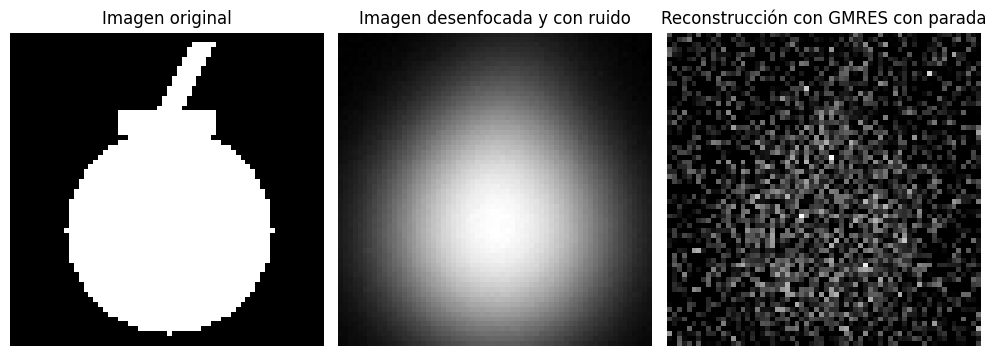

In [63]:
# Hacemos subplots para hacer 2 gráficos en uno
plt.figure(figsize=(10, 4))

# Graficamos la imagen original
plt.subplot(1, 3, 1)
plt.imshow(imagen_true, vmin=0, vmax=np.max(imagen_true), cmap='gray')
plt.title("Imagen original")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(imagen_b_noise, vmin=0, vmax=np.max(imagen_b_noise), cmap='gray')
plt.title("Imagen desenfocada y con ruido")
plt.axis('off')

# Graficamos la reconstrucción con GMRES con parada
plt.subplot(1, 3, 3)
imagen_gmres_con_parada = funciones.im(x_gmres_con_parada, dimensiones)
plt.imshow(imagen_gmres_con_parada, vmin=0, vmax=np.max(imagen_gmres_con_parada), cmap='gray')
plt.title("Reconstrucción con GMRES con parada")
plt.axis('off')

# Mostramos
plt.tight_layout()
plt.show()

Observamos una performance significativamente mejor a la ingenua, pero aún bastante insatisfactoria. Algo positivo en este caso es que casi podemos distinguir formas: la H se empieza a vislumbrar

### Regularización de Tikhonov

Otro posible enfoque es afrontar el problema haciendo primero una regularización de Tikhonov, esto es, pasar de querer resolver el problema 
$$ \mathbf{Ax = b}\,,$$

a intentar resolver

$$\min_{\mathbf x} \|\mathbf{Ax-b}\|_2^2 + \lambda^2 \|\mathbf{x}\|_2^2\,,$$

donde $\lambda > 0$ es un hiperparámetro llamado "de regularización", que ayuda a mantener $\|x\|_2^2$ pequeño, lo cual nos interesa para tener buenas soluciones.

Se puede demostrar que resolver ese problema de minimización es equivalente a resolver el sistema

$$(\mathbf{A}^T \mathbf{A} + \lambda^2 I) \mathbf{x} = \mathbf{A}^T \mathbf{b}\,,$$

lo cual podemos hacer utilizando GMRES.

In [32]:
# Elegimos un lambda arbitrario y ploteo la solución
lamb = 1/4

# Resolvemos con GMRES
A_reg = A.T @ A + lamb**2 * np.eye(A.shape[0])
b_reg = A.T @ b_noise
x_reg, _ = sp.sparse.linalg.gmres(A_reg, b_reg)

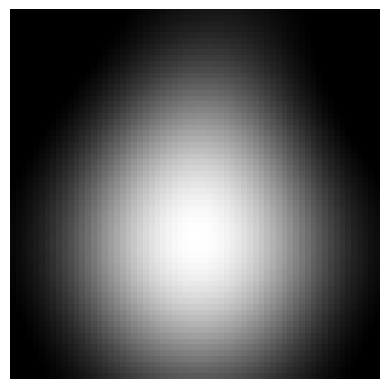

In [33]:
funciones.mostrar_vector(x_reg, dimensiones)

Sin embargo, al involucrar demasiadas operaciones donde aparece la matriz $\mathbf A$, que como sabemos es pésimamente condicionada, este método no nos va a dar los mejores resultados por sus errores numéricos, de modo que encararemos la solución de Tikhonov por otro lado:

Podemos recordar que en los métodos de filtrado la solución viene dada como

$$ \mathbf{x_filt = \sum_{i=1}^{n} \phi_i \frac{u_i^T b}{\sigma_i} v_i}$$

donde los $\mathbf{u_i, v_i}$ son los vectores singulares y los $\mathbf{\sigma_i}$ los valores singulares y los $\phi_i$ son los coeficientes de filtraado que elegimos, en el caso de Tikhonov estos vienen dados por

$$ \mathbf{ \phi_i = \frac{\sigma_i^2}{\sigma_i^2 + \lambda^2}}$$

Construyamos, entonces, esos coeficientes $\mathbf{\phi_i}$

In [34]:
# Obtenemos la descomposición SVD 
U, Sigma, Vt = np.linalg.svd(A)

In [35]:
# Elegimos un parámetro lambda arbitrario para el ejemplo
lamb = 1/4
# Obtenemos los coeficientes de Tikhonov divididos por sigma_i
tikh_coef = np.array([s/(s**2 + lamb**2) for s in Sigma]) 

La solución estará dada entonces por

$$\mathbf{x_{\rm tikh} = \sum_{i=1}^{n} \frac{\sigma_i^2}{\sigma_i^2 + \lambda^2} \frac{u_i^T b}{\sigma_i} v_i = \sum_{i=1}^{n} v_i\frac{\sigma_i}{\sigma_i^2 + \lambda^2} u_i^T b}$$

In [36]:
# La solución de Tikhonov viene dada por la suma de arriba
x_tikh = Vt.T @ np.diag(tikh_coef) @ U.T @ b_noise

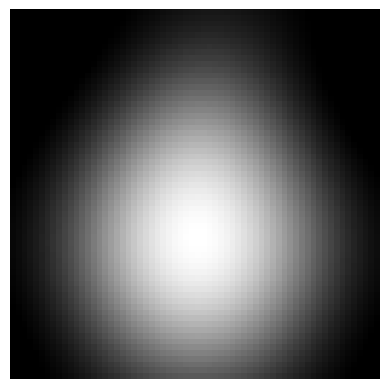

In [37]:
# Mostramos la solución
funciones.mostrar_vector(x_tikh, dimensiones)

Podemos observar una mejora con respecto a la solución de GMRES con parada, pero aún así, el $\lambda$ que elegimos fue totalmente arbitrario, y quizás hay $\lambda$'s que nos generan una solución mucho mejor, con lo cual deberíamos utilizar algún método confiable para seleccionar este hipérparametro $\lambda$.

#### Curva L

Uno de los métodos más usados para determinar hipérparámetros, es el de la "Curva L" o "L-Curve", una curva parametrizada por $\lambda$, donde comparamos $\|\mathbf{Ax}^{\rm reg} - \mathbf{b}\|$ vs $\|\mathbf{x}^{\rm reg}\|$ y buscamos visualmente un "codo", para obtener el $\lambda$ ideal.

In [38]:
# Generamos un espacio de lambdas
lambdas = np.logspace(-6,0)

# Creamos vector para ir guardando las normas de los residuos y los coeficientes de regularización
residuos = []
xs = []

for lamb in lambdas:
    tikh_coef = np.array([s/(s**2 + lamb**2) for s in Sigma]) 
    x_tikh = Vt.T @ np.diag(tikh_coef) @ U.T @ b_noise
    xs.append(np.linalg.norm(x_tikh))
    residuos.append(np.linalg.norm(A@x_tikh - b_noise))

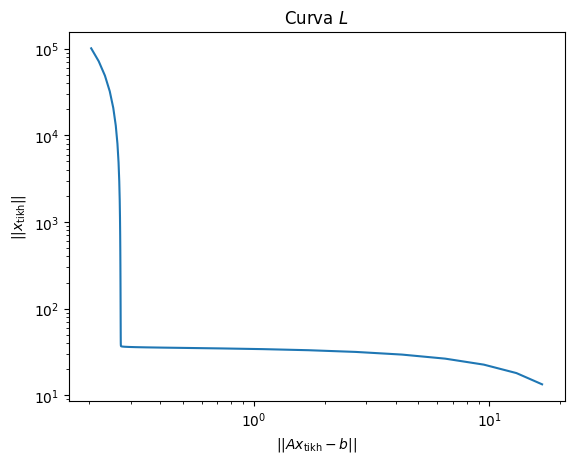

In [39]:
plt.loglog(residuos, xs)
plt.title(r"Curva $L$")
plt.xlabel(r'$||Ax_{\rm tikh} - b||$')
plt.ylabel(r'$||x_{\rm tikh}||$')
plt.savefig("Imagenes/L_curve_tikh.png")
plt.show()

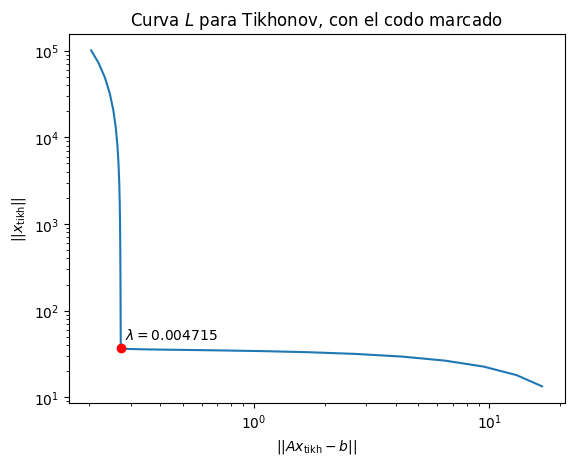

In [40]:
# Mostramos la curva L con el codo marcado
plt.loglog(residuos, xs)
plt.title(r"Curva $L$ para Tikhonov, con el codo marcado")
plt.xlabel(r'$||Ax_{\rm tikh} - b||$')
plt.ylabel(r'$||x_{\rm tikh}||$')
plt.scatter(residuos[30],xs[30], color="red",zorder=3)
plt.text(residuos[30] + 0.01, xs[30]+10, fr'$\lambda={round(lambdas[30],6)}$', fontsize=10)
plt.savefig("Imagenes/L_curve_tikh_codo.png")
plt.show()

In [41]:
# Mostramos el lambda ideal obtenido
print(f"El lambda ideal obtenido por la curva L es {lambdas[30]}")

El lambda ideal obtenido por la curva L es 0.004714866363457394


In [42]:
# Obtenemos la solución ideal
tikh_coef = np.array([s/(s**2 + lambdas[30]**2) for s in Sigma]) 
x_tikh = Vt.T @ np.diag(tikh_coef) @ U.T @ b_noise

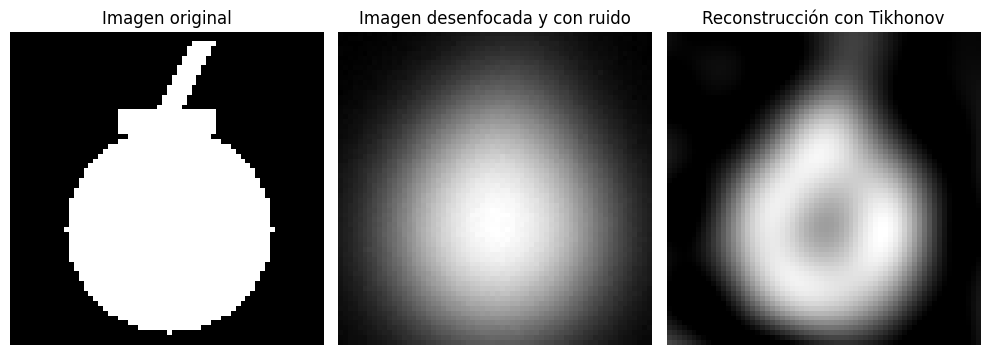

In [65]:
# Hacemos subplots para hacer 2 gráficos en uno
plt.figure(figsize=(10, 4))

# Graficamos la imagen original
plt.subplot(1, 3, 1)
plt.imshow(imagen_true, vmin=0, vmax=np.max(imagen_true), cmap='gray')
plt.title("Imagen original")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(imagen_b_noise, vmin=0, vmax=np.max(imagen_b_noise), cmap='gray')
plt.title("Imagen desenfocada y con ruido")
plt.axis('off')

# Graficamos la reconstrucción con Tikhonov con lambda elegido por la curva L
plt.subplot(1, 3, 3)
imagen_tikh = funciones.im(x_tikh, dimensiones)
plt.imshow(imagen_tikh, vmin=0, vmax=np.max(imagen_tikh), cmap='gray')
plt.title("Reconstrucción con Tikhonov")
plt.axis('off')

# Mostramos
plt.tight_layout()
plt.savefig("Imagenes/mate_tikh.png")
plt.show()

Vemos como ahora obtenemos una solución que se parece bastante más a la 'H' original

### Regularización de Tikhonov Generalizada

Otro enfoque es extender la regularización de Tikhonov a $$\mathbf{\min_{x} \|Ax-b\|_2^2 + \lambda^2 \|Lx\|_2^2}\,,$$ donde $L$ es un operador de regularización que puede ser, por ejemplo, la derivada o alguna otra transformación. En este ejemplo, usaremos $L$ como el operador de la primera derivada.

In [44]:
# Creamos el operador L
L = funciones.operador_derivada_2D(dimensiones[0])

Sabemos que el problema tiene solución

$$ \mathbf{x_{\rm GTikh} = (A^T A + \lambda^2 L^T L)^{-1}A^T b}$$

In [45]:
# Creamos la L-Curve para determinar lambda

# Creamos vector para ir guardando las normas de los residuos y los coeficientes de regularización
residuos_der = []
xs_der = []

for lamb in lambdas:
    x_gtikh = np.linalg.solve(A.T.dot(A) + lamb**2 * L.T.dot(L), A.T.dot(b_noise))
    xs_der.append(np.linalg.norm(x_gtikh))
    residuos_der.append(np.linalg.norm(A@x_gtikh - b_noise))

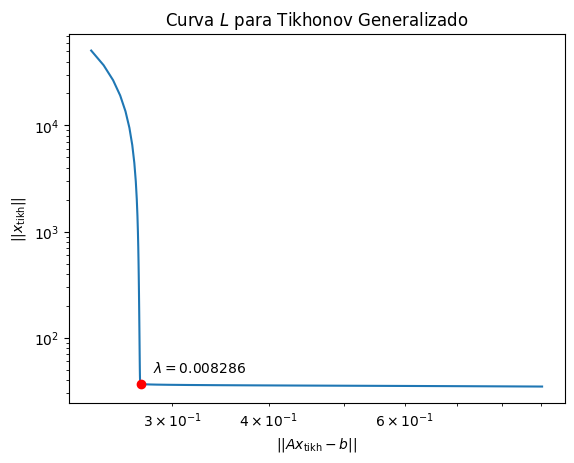

In [46]:
# Mostramos la curva L y el codo
plt.loglog(residuos_der, xs_der)
plt.title(r"Curva $L$ para Tikhonov Generalizado")
plt.xlabel(r'$||Ax_{\rm tikh} - b||$')
plt.ylabel(r'$||x_{\rm tikh}||$')
plt.scatter(residuos_der[32],xs_der[32], color="red",zorder=3)
plt.text(residuos_der[32] + 0.01, xs_der[32]+10, fr'$\lambda={round(lambdas[32],6)}$', fontsize=10)
plt.savefig("Imagenes/L_curve_gtikh")
plt.show()

In [47]:
# Mostramos el lambda ideal obtenido
print(f"El lambda ideal obtenido por la curva L es {lambdas[32]}")

El lambda ideal obtenido por la curva L es 0.008286427728546842


In [48]:
# Obtenemos la solución
x_gtikh = np.linalg.solve(A.T.dot(A) + lambdas[32]**2 * L.T.dot(L), A.T.dot(b_noise))

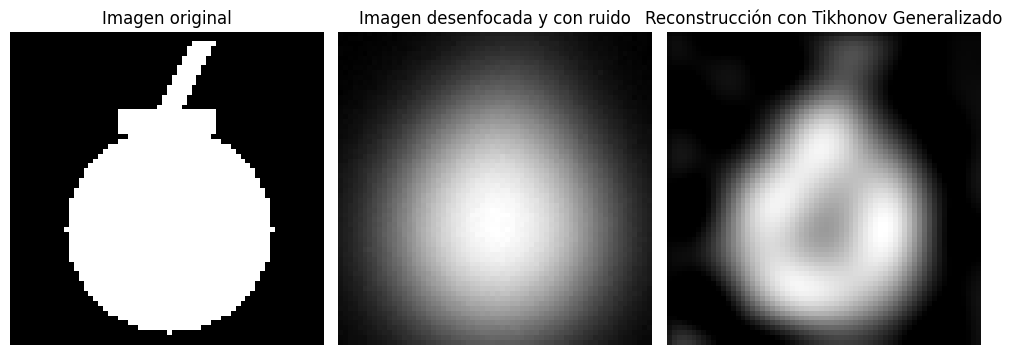

In [67]:
# Hacemos subplots para hacer 2 gráficos en uno
plt.figure(figsize=(10, 4))

# Graficamos la imagen original
plt.subplot(1, 3, 1)
plt.imshow(imagen_true, vmin=0, vmax=np.max(imagen_true), cmap='gray')
plt.title("Imagen original")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(imagen_b_noise, vmin=0, vmax=np.max(imagen_b_noise), cmap='gray')
plt.title("Imagen desenfocada y con ruido")
plt.axis('off')

# Graficamos la reconstrucción con Tikhonov generalizado, usando L como la primera derivada
plt.subplot(1, 3, 3)
imagen_gtikh = funciones.im(x_gtikh, dimensiones)
plt.imshow(imagen_gtikh, vmin=0, vmax=np.max(imagen_gtikh), cmap='gray')
plt.title("Reconstrucción con Tikhonov Generalizado")
plt.axis('off')

# Mostramos
plt.tight_layout()
plt.savefig("Imagenes/mate_gtikh.png")
plt.show()

La solución mejoró, pero esta vez no tanto.

## Bonus

### LSQR

También podríamos intentar resolver con otros métodos como LSQR que minimizan $\|Ax-b\|_2^2$ a la vez que $\|x\|_2^2$, lo cual nos interesa pues ya hay una regularización inherente al método. Los probamos acá:

In [50]:
# Obtenemos la solución de LSQR
lamb = 1/80
x_lsqr = sp.sparse.linalg.lsqr(A, b_noise, damp = lamb)

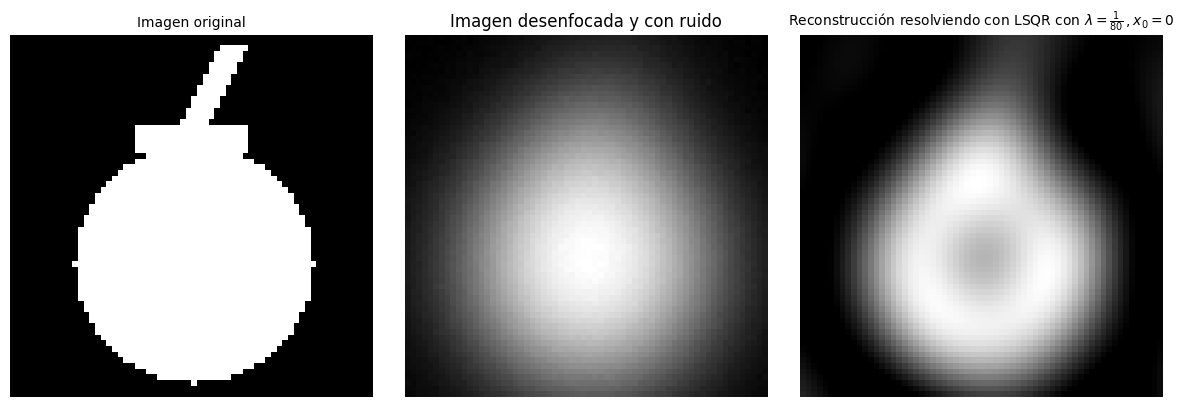

In [69]:
# Hacemos subplots para hacer 2 gráficos en uno
plt.figure(figsize=(12, 4))

# Graficamos la imagen original
plt.subplot(1, 3, 1)
plt.imshow(imagen_true, vmin=0, vmax=np.max(imagen_true), cmap='gray')
plt.title("Imagen original", fontsize = 10)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(imagen_b_noise, vmin=0, vmax=np.max(imagen_b_noise), cmap='gray')
plt.title("Imagen desenfocada y con ruido")
plt.axis('off')

# Graficamos la reconstrucción naive
plt.subplot(1, 3, 3)
imagen_lsqr = funciones.im(x_lsqr[0], dimensiones)
plt.imshow(imagen_lsqr, vmin=0, vmax=np.max(imagen_lsqr), cmap='gray')
plt.title(r"Reconstrucción resolviendo con LSQR con $\lambda = \frac{1}{80}\,, x_0 = 0$", fontsize = 10)
plt.axis('off')

# Mostramos
plt.tight_layout()
plt.savefig("Imagenes/mate_lsqr")
plt.show()

### LSMR

También podríamos intentar resolver con otros métodos como LSQR que minimizan $\|Ax-b\|_2^2$ a la vez que $\|x\|_2^2$, lo cual nos interesa pues ya hay una regularización inherente al método. Los probamos acá:

In [52]:
# Obtenemos la solución de LSQR
lamb = 1/80
x_lsmr = sp.sparse.linalg.lsmr(A, b_noise, damp = lamb)

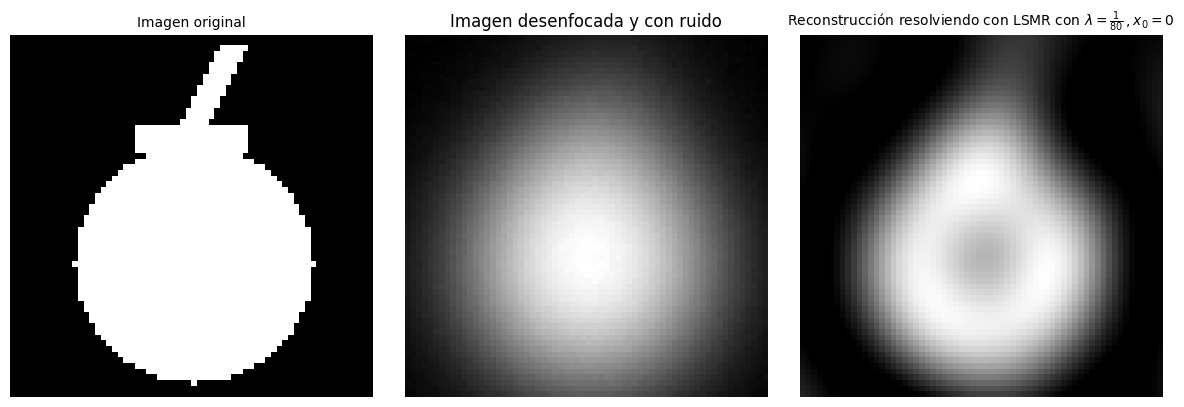

In [70]:
# Hacemos subplots para hacer 2 gráficos en uno
plt.figure(figsize=(12, 4))

# Graficamos la imagen original
plt.subplot(1, 3, 1)
plt.imshow(imagen_true, vmin=0, vmax=np.max(imagen_true), cmap='gray')
plt.title("Imagen original", fontsize = 10)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(imagen_b_noise, vmin=0, vmax=np.max(imagen_b_noise), cmap='gray')
plt.title("Imagen desenfocada y con ruido")
plt.axis('off')

# Graficamos la reconstrucción naive
plt.subplot(1, 3, 3)
imagen_lsmr = funciones.im(x_lsmr[0], dimensiones)
plt.imshow(imagen_lsmr, vmin=0, vmax=np.max(imagen_lsmr), cmap='gray')
plt.title(r"Reconstrucción resolviendo con LSMR con $\lambda = \frac{1}{80}\,, x_0 = 0$", fontsize = 10)
plt.axis('off')

# Mostramos
plt.tight_layout()
plt.savefig("Imagenes/mate_lsmr")
plt.show()

### Gradiente conjugado

Bla bla explicación

In [54]:
x_cg = sp.sparse.linalg.cg(A.T.dot(A) + lambdas[32]**2 * L.T.dot(L), A.T.dot(b_noise))

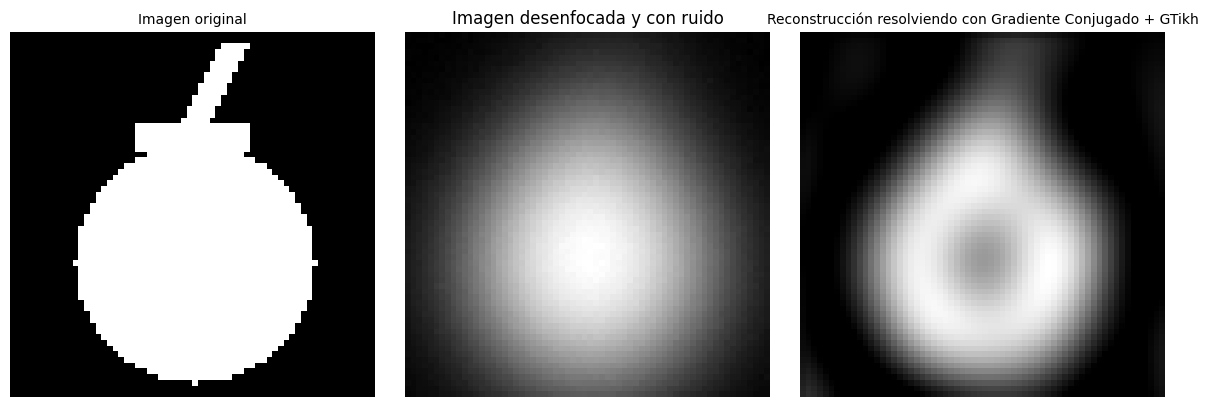

In [71]:
# Hacemos subplots para hacer 2 gráficos en uno
plt.figure(figsize=(12, 4))

# Graficamos la imagen original
plt.subplot(1, 3, 1)
plt.imshow(imagen_true, vmin=0, vmax=np.max(imagen_true), cmap='gray')
plt.title("Imagen original", fontsize = 10)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(imagen_b_noise, vmin=0, vmax=np.max(imagen_b_noise), cmap='gray')
plt.title("Imagen desenfocada y con ruido")
plt.axis('off')

# Graficamos la reconstrucción naive
plt.subplot(1, 3, 3)
imagen_cg = funciones.im(x_cg[0], dimensiones)
plt.imshow(imagen_cg, vmin=0, vmax=np.max(imagen_cg), cmap='gray')
plt.title(r"Reconstrucción resolviendo con Gradiente Conjugado + GTikh", fontsize = 10)
plt.axis('off')

# Mostramos
plt.tight_layout()
plt.savefig("Imagenes/mate_lsmr")
plt.show()

### Experimentando cosas raras

In [56]:
# No sé exactamente qué es esto..

"""
lamb = 1/64
minerror = 10000
maxiter = 10
p = 1

while lamb > 1e-04:
    x = x_gtikh
    for _ in range(maxiter):
        x_old = x
        w =np.array(abs(L.dot(x_old)))
        w[w < 0.02] = 0.001
        W = np.diag(w)
        W = sp.linalg.fractional_matrix_power(W, (p-2))
        x = np.dot( np.linalg.inv( A.T.dot(A) + lamb**2*L.T.dot(W).dot(L)), A.T.dot(b_noise) )
        error = np.linalg.norm(x - x_true)/np.linalg.norm(x_true)
    if error < minerror:
        minerror = error
        minlamb = lamb
        minTV = x
    lamb /= 2

print('Minima:')
print('Lambda   = ', minlamb)
print('error   = ', minerror)
funciones.mostrar_vector(minTV, dimensiones)
"""


"\nlamb = 1/64\nminerror = 10000\nmaxiter = 10\np = 1\n\nwhile lamb > 1e-04:\n    x = x_gtikh\n    for _ in range(maxiter):\n        x_old = x\n        w =np.array(abs(L.dot(x_old)))\n        w[w < 0.02] = 0.001\n        W = np.diag(w)\n        W = sp.linalg.fractional_matrix_power(W, (p-2))\n        x = np.dot( np.linalg.inv( A.T.dot(A) + lamb**2*L.T.dot(W).dot(L)), A.T.dot(b_noise) )\n        error = np.linalg.norm(x - x_true)/np.linalg.norm(x_true)\n    if error < minerror:\n        minerror = error\n        minlamb = lamb\n        minTV = x\n    lamb /= 2\n\nprint('Minima:')\nprint('Lambda   = ', minlamb)\nprint('error   = ', minerror)\nfunciones.mostrar_vector(minTV, dimensiones)\n"